In [131]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

### Using a chrome webdriver to control the browser and interact with web elements

In [51]:
# Create a Chrome web driver instance with the automatically downloaded ChromeDriver
# From chrome version 115 onwards, you are required to download the ChromeDriver manually, so
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager(version="114.0.5735.90").install()), 
options=options)

In [52]:
witcher_page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(witcher_page_url)

In [ ]:
# use By class to locate web elements, to accept cookies to find data etc
from selenium.webdriver.common.by import By
# accept the cookies popup
time.sleep(3)
driver.find_element(By.XPATH, "//div[(text()='ACCEPT')]").click()

### Find all the books

In [54]:
witcher_book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [55]:
books = []
for category in witcher_book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

In [48]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [56]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

pd.DataFrame(character_list)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1271,Category:Time of Contempt characters,Yanna of Murivel
1272,Category:Time of Contempt characters,Yarpen Zigrin
1273,Category:Time of Contempt characters,Yennefer of Vengerberg
1274,Category:Time of Contempt characters,Yiolenta Suarez


In [57]:
witcher_df = pd.DataFrame(character_list)
witcher_df.to_csv('witcher_chars.csv')

### Do the same for malazan? okie

In [60]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager(version="114.0.5735.90").install()), 
options=options)

In [118]:
malazan_page_url = "https://malazan.fandom.com/wiki/Malazan_Book_of_the_Fallen"
driver.get(malazan_page_url)

In [119]:
# Obtain Xpath by inspecting webpage
mal_books_xpath = "/html/body/div[4]/div[4]/div[3]/main/div[3]/div/div/ul[1]"

ul_element = driver.find_element(By.XPATH,mal_books_xpath)
li_elements = ul_element.find_elements(By.TAG_NAME,"li")

malazan_books = []
# Iterate through each <li> element
for li_element in li_elements:
    # Find the <i> element inside the <li> element
    i_element = li_element.find_element(By.TAG_NAME,"i")

    # Find the <a> element inside the <i> element
    a_element = i_element.find_element(By.TAG_NAME,"a")

    # Extract the link text and URL
    book_name = a_element.text
    book_url = a_element.get_attribute("href")

    malazan_books.append({'book_name': book_name, "url": book_url})

In [120]:
for book in malazan_books:
    book["url"] += "/Dramatis_Personae"

In [121]:
malazan_books

[{'book_name': 'Gardens of the Moon',
  'url': 'https://malazan.fandom.com/wiki/Gardens_of_the_Moon/Dramatis_Personae'},
 {'book_name': 'Deadhouse Gates',
  'url': 'https://malazan.fandom.com/wiki/Deadhouse_Gates/Dramatis_Personae'},
 {'book_name': 'Memories of Ice',
  'url': 'https://malazan.fandom.com/wiki/Memories_of_Ice/Dramatis_Personae'},
 {'book_name': 'House of Chains',
  'url': 'https://malazan.fandom.com/wiki/House_of_Chains/Dramatis_Personae'},
 {'book_name': 'Midnight Tides',
  'url': 'https://malazan.fandom.com/wiki/Midnight_Tides/Dramatis_Personae'},
 {'book_name': 'The Bonehunters',
  'url': 'https://malazan.fandom.com/wiki/The_Bonehunters/Dramatis_Personae'},
 {'book_name': "Reaper's Gale",
  'url': 'https://malazan.fandom.com/wiki/Reaper%27s_Gale/Dramatis_Personae'},
 {'book_name': 'Toll the Hounds',
  'url': 'https://malazan.fandom.com/wiki/Toll_the_Hounds/Dramatis_Personae'},
 {'book_name': 'Dust of Dreams',
  'url': 'https://malazan.fandom.com/wiki/Dust_of_Dreams/Dr

In [105]:
trial = malazan_books[:1]

In [110]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

character_list = []

for book in malazan_books:
    # go to book page
    driver.get(book['url'])
    wait = WebDriverWait(driver, 10)

    char_xpath = "/html/body/div[4]/div[4]/div[3]/main/div[3]/div/div/div/div[2]"

    div_element = driver.find_element(By.XPATH,char_xpath)
    ul_elements = div_element.find_elements(By.TAG_NAME,"ul")

    for ul_element in ul_elements:
        li_elements = ul_element.find_elements(By.TAG_NAME,"li")
        for li_element in li_elements:
            b_element = li_element.find_element(By.TAG_NAME,"b")
            a_element = b_element.find_element(By.TAG_NAME,"a")
            character_list.append({'book': book['book_name'],'character': a_element.text})


In [111]:
malazan_df = pd.DataFrame(character_list)
malazan_df.to_csv('malazan_chars.csv')

### NOTME books

In [122]:
notme_url = "https://malazan.fandom.com/wiki/Novels_of_the_Malazan_Empire"
driver.get(notme_url)

notme_xpath = "/html/body/div[4]/div[4]/div[3]/main/div[3]/div/div/ul[1]"

ul_element = driver.find_element(By.XPATH,mal_books_xpath)
li_elements = ul_element.find_elements(By.TAG_NAME,"li")

notme_books = []
# Iterate through each <li> element
for li_element in li_elements:
    # Find the <i> element inside the <li> element
    i_element = li_element.find_element(By.TAG_NAME,"i")

    # Find the <a> element inside the <i> element
    a_element = i_element.find_element(By.TAG_NAME,"a")

    # Extract the link text and URL
    book_name = a_element.text
    book_url = a_element.get_attribute("href")

    notme_books.append({'book_name': book_name, "url": book_url})

In [123]:
for book in notme_books:
    book["url"] += "/Dramatis_Personae"

In [125]:
notme_books

[{'book_name': 'Night of Knives',
  'url': 'https://malazan.fandom.com/wiki/Night_of_Knives/Dramatis_Personae'},
 {'book_name': 'Return of the Crimson Guard',
  'url': 'https://malazan.fandom.com/wiki/Return_of_the_Crimson_Guard/Dramatis_Personae'},
 {'book_name': 'Stonewielder',
  'url': 'https://malazan.fandom.com/wiki/Stonewielder/Dramatis_Personae'},
 {'book_name': 'Orb Sceptre Throne',
  'url': 'https://malazan.fandom.com/wiki/Orb_Sceptre_Throne/Dramatis_Personae'},
 {'book_name': 'Blood and Bone',
  'url': 'https://malazan.fandom.com/wiki/Blood_and_Bone/Dramatis_Personae'},
 {'book_name': 'Assail',
  'url': 'https://malazan.fandom.com/wiki/Assail_(novel)/Dramatis_Personae'}]

In [126]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


for book in notme_books:
    # go to book page
    driver.get(book['url'])
    wait = WebDriverWait(driver, 10)

    char_xpath = "/html/body/div[4]/div[4]/div[3]/main/div[3]/div/div/div/div[2]"

    div_element = driver.find_element(By.XPATH,char_xpath)
    ul_elements = div_element.find_elements(By.TAG_NAME,"ul")

    for ul_element in ul_elements:
        li_elements = ul_element.find_elements(By.TAG_NAME,"li")
        for li_element in li_elements:
            b_element = li_element.find_element(By.TAG_NAME,"b")
            a_element = b_element.find_element(By.TAG_NAME,"a")
            character_list.append({'book': book['book_name'],'character': a_element.text})

In [129]:
malazan_df = pd.DataFrame(character_list)
malazan_df.to_csv('malazan_chars.csv')

In [130]:
driver.quit()

### Some basic plots

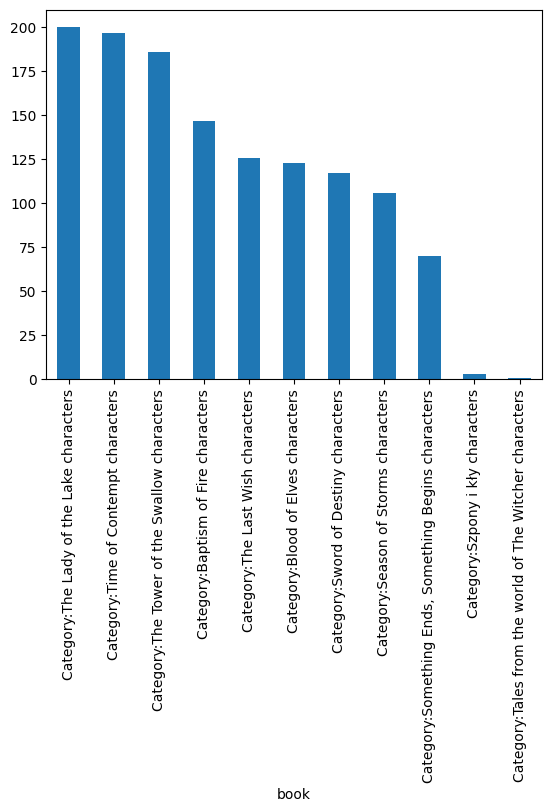

In [136]:
witcher_df['book'].value_counts().plot(kind='bar')
plt.show()

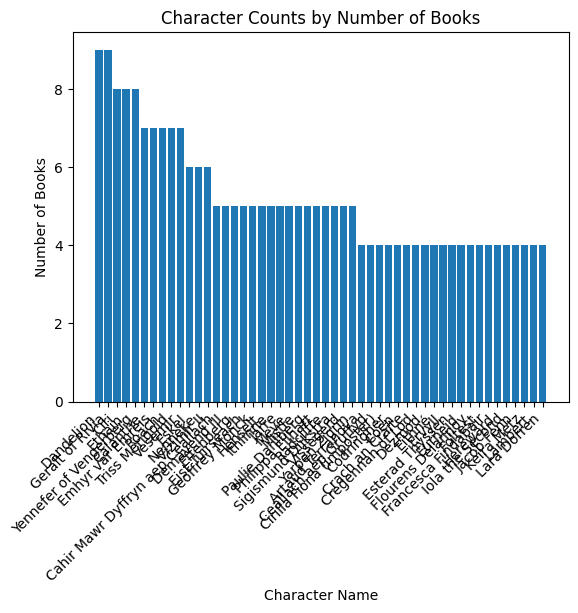

In [137]:
character_counts = witcher_df.groupby('character')['book'].nunique()

top_50_characters = character_counts.nlargest(50)

plt.bar(top_50_characters.index, top_50_characters.values)
plt.xlabel('Character Name')
plt.ylabel('Number of Books')
plt.title('Character Counts by Number of Books')
plt.xticks(rotation=45, ha='right')

plt.show()

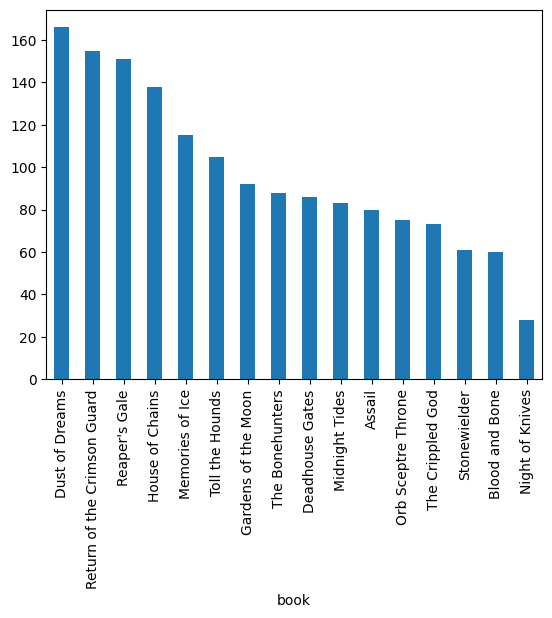

In [132]:
malazan_df['book'].value_counts().plot(kind='bar')
plt.show()

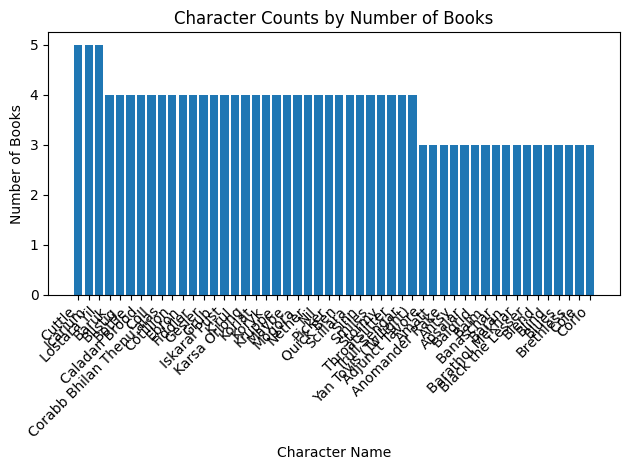

In [135]:
character_counts = malazan_df.groupby('character')['book'].nunique()

top_50_characters = character_counts.nlargest(50)

plt.bar(top_50_characters.index, top_50_characters.values)
plt.xlabel('Character Name')
plt.ylabel('Number of Books')
plt.title('Character Counts by Number of Books')
plt.xticks(rotation=45, ha='right')

plt.show()

If you have a large dataset with many variations of character names and you don't want to standardize them manually, you can consider using automated techniques to handle this task. One common approach is to use string similarity or fuzzy matching algorithms to identify and group similar names together.
The fuzzywuzzy library in Python is one such tool that can be helpful in achieving this. It provides a simple interface for fuzzy string matching, which can be used to find similarities between character names and map them to a standardized form.